In [1]:
import vvp_project_support as sup
from vvp_oop_sup import Maze
import matplotlib.pyplot as plt

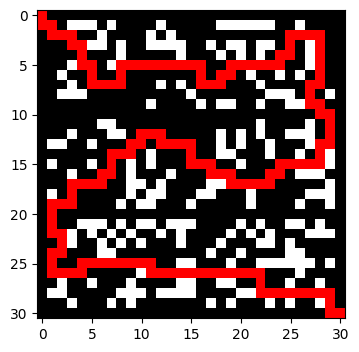

In [2]:
maze = Maze('data/maze_5.csv')
maze.incidence_matrix()
maze.dijkstra()
maze.path_matrix()
maze.draw()

In [3]:
"""
Templates - druhý argument generator_maze funkce
0 == Blank
1 == Slalom diagonal
2 == Big Diag
3 == Slalom horizontal
"""

'\nTemplates - druhý argument generator_maze funkce\n0 == Blank\n1 == Slalom diagonal\n2 == Big Diag\n3 == Slalom horizontal\n'

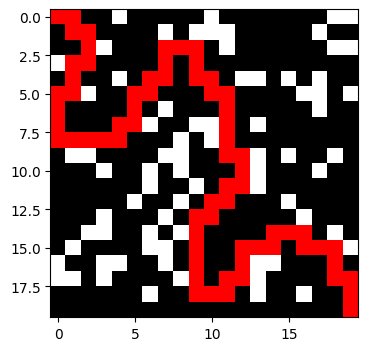

In [4]:
maze = Maze()
maze.generator_maze(20, 1)
maze.draw()

In [5]:
maze = Maze
print(maze.generator_maze.__doc__)


        Vstup:
            n - rozměr bludiště
            template_number - výběr přednastavených šablon
        Výstup:
            Přímo nevrací nic (do proměnné "self.maze" uloží bludiště)
        


__Bonus:__ kontrola šablon 

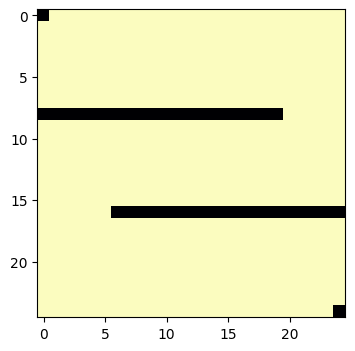

In [6]:
n = 25 #!  templates are for sizes bigger than 14
import numpy as np
import matplotlib.pyplot as plt

#*napis sablonu
indexy = [(i,j) for i in range(n) for j in range(n)]
tretina = int(n/3)
for i in range(n):
    for j in range(n):
        if(((i == tretina and j<n*4/5) or (i == 2*tretina and j>n/5))):
            indexy.remove((i,j))

indexy.remove((0,0))
indexy.remove((n-1, n-1))

matrix = np.zeros((n,n))
for i in range(len(indexy)):
    u,j = indexy[i]
    matrix[u,j] = 1
plt.figure(figsize=(8,4))
plt.imshow(matrix, cmap='magma')
plt.show()